In [ ]:
import numpy as np
import math
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import rc
from numpy import asarray
from numpy import savetxt
from numpy.lib.arraypad import pad

# Diagrams

## functions

In [ ]:
global mode_labels, mode_colors
mode_labels = ['Proposed Fixed Resource Monitoring', 'Proposed Adaptive Resource Monitoring', 'Random Monitoring' , 'Fixed Nodes Monitoring', 'All Nodes Monitoring (Baseline)']
mode_colors = ['#0000FF', '#FF0000', '#4C9A2A' , '#7D451A', '#000000']

In [ ]:
def mode_handler(mode, ind=None):
  global fixed, ours, random, alll, random_fixed, threshold, mode_labels, mode_colors
  handler = None
  if ind is not None:
    if mode == 'fixed':
      handler = fixed[ind]
    elif mode == 'ours':
      handler = ours[ind]
    elif mode == 'random':
      handler = random[ind]
    elif mode == 'all':
      handler = alll[ind]
    elif mode == 'random_fixed':
      handler = random_fixed[ind]
    elif mode == 'threshold':
      handler = threshold[ind]
  if mode == 'fixed':
    label = mode_labels[3]
    color = mode_colors[3]
  elif mode == 'ours':
    label = mode_labels[0]
    color = mode_colors[0]
  elif mode == 'random':
    label = mode_labels[5]
    color = mode_colors[5]
  elif mode == 'all':
    label = mode_labels[4]
    color = mode_colors[4]
  elif mode == 'random_fixed':
    label = mode_labels[2]
    color = mode_colors[2]
  elif mode == 'threshold':
    label = mode_labels[1]
    color = mode_colors[1]
  return handler, label, color

## Plots for Different $\alpha$

In [ ]:
packed_for_a_list = []
threshold_list = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05, 0]
for a in threshold_list:
  packed_for_m = np.load('packed_for_m1a' + str(a) + '.npy', allow_pickle=True)
  for pack in packed_for_m:
    packed_for_a_list.append(pack)
    break

In [ ]:
print(len(packed_for_a_list))

11


### Average Total Error - Measuring Noise error (q) - bar

In [ ]:
fixed, ours, random, alll, random_fixed, threshold = [], [], [], [], [], []
modes = ['all', 'threshold', 'ours', 'random_fixed', 'fixed']

In [ ]:
max_num = 100
T = 10

[7]
[6]
[5]
[6]
[9]
[12]
[8]
[4]
[11]
[2]
[0]
[0.5  0.45 0.4  0.35 0.3  0.25 0.2  0.15 0.1  0.05 0.  ]


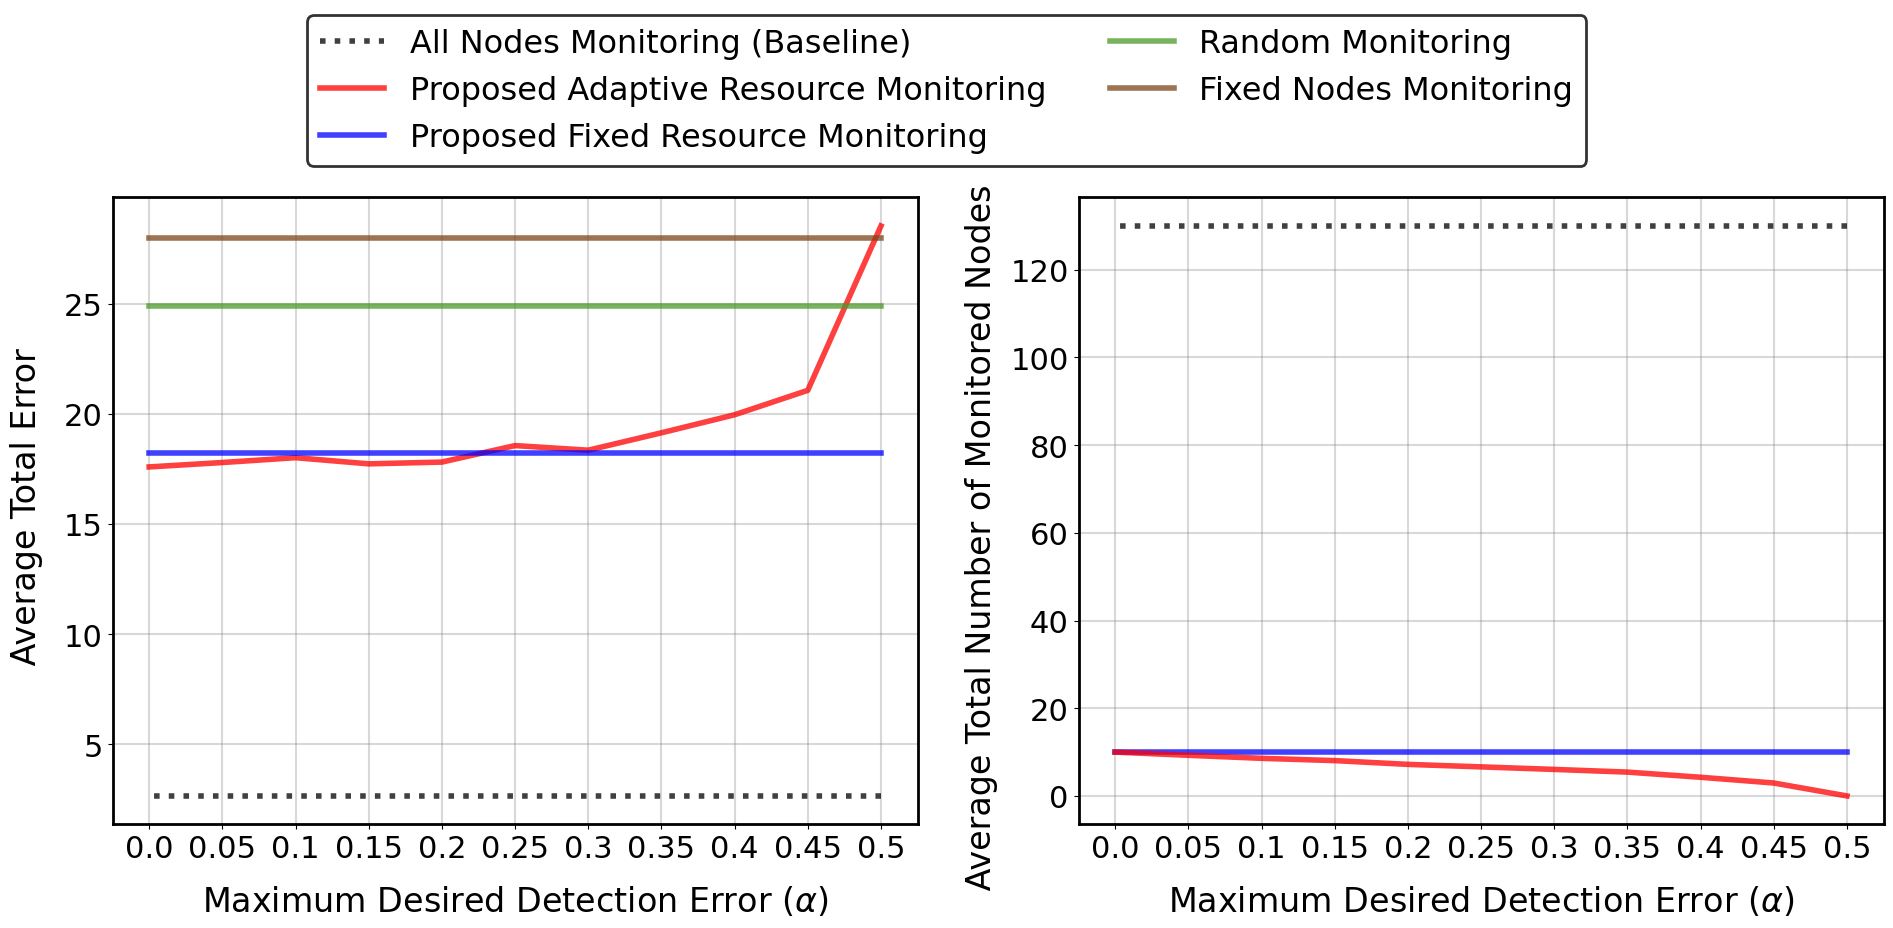

In [ ]:
plt.rcdefaults()
fig, axis = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)

fontsize = 24

ax1 = axis[0]
l = len(modes)/2
j=0
for mode in modes:
  mean_of_mean = np.zeros(len(threshold_list))
  i=0
  for pack in packed_for_a_list:
    # print(pack)
    # print(pack[0][0][2])
    (fixed, ours, random, alll, random_fixed, threshold) = pack
    # print(fixed[4][0][0])
    # print(random[4])
    all_tot_err_list, mode_label, mode_color= mode_handler(mode, 2)
    mean_tot_err_list = 0
    for num in range(0, max_num):
      # print(all_tot_err_list[num])
      mean_tot_err_list += np.sum(all_tot_err_list[num])
    # mean_of_mean[i-1] = np.sum(mean_tot_err_list)/(T  * max_num)
    mean_of_mean[i] = np.sum(mean_tot_err_list)/(max_num)
    i += 1
    # print(mean_of_mean)
    width = 0.1  # the width of the bars
    j += 1
    # mean_mon_list_random_fixed =occurance_random_fixed/max_num
    # rects2 = ax1.bar(np.arange(len(q_list)) + (-width*l + (j)*width  - width/2), mean_of_mean, width ,label=mode_label,color=mode_color, alpha=0.75, edgecolor="black")
    # print(mean_of_mean)
  linestyle = "solid"
  if mode=='all':
    linestyle = "dotted"
  if mode !='threshold':
    mean_of_mean = np.full(np.shape(mean_of_mean), mean_of_mean[0])
  rects2 = ax1.plot(np.array(threshold_list) , mean_of_mean, linewidth = 4 ,label=mode_label,color=mode_color, alpha=0.75, linestyle =linestyle)
  # rects1 = ax1.bar(np.arange(m)+width/2, mean_mon_list_threshold, width, label=mode_labels[1],color=mode_colors[1], alpha=0.75,edgecolor="black" )
  # # rects3 = ax1.bar(np.arange(m)+width, mean_mon_list_random_fixed, width, label=mode_labels[2],color=mode_colors[2], alpha=0.75,edgecolor="black" )

ax1.set_xticks(np.array(threshold_list))
ax1.yaxis.set_tick_params(labelsize=fontsize-2)
ax1.set_xticklabels(np.array(threshold_list), fontsize=fontsize-1)
ax1.set_ylabel(r' Average Total Error', fontsize=fontsize, labelpad=15)
ax1.set_xlabel(r'Maximum Desired Detection Error ($\alpha$)', fontsize=fontsize, labelpad=15)
# ax1.legend(prop={'size': fontsize-2})
ax1.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)


ax1 = axis[1]

l = (len(modes)-1)/2
j=0
# Have for diffferent qs.
i=0
num1 = np.zeros(len(threshold_list))
num2 = np.zeros(len(threshold_list))
num3 = np.zeros(len(threshold_list))
for pack in packed_for_a_list:
  j = 0
  i += 1
  (fixed, ours, random, alll, random_fixed, threshold) = pack
  all_mon_list, mode_label, mode_color= mode_handler('ours', 4)
  print(all_mon_list[0][0])
  for arr in all_mon_list:
    for arr2 in arr:
      num1[i-1] += len(arr2)
  all_mon_list, mode_label, mode_color= mode_handler('threshold', 4)
  for arr in all_mon_list:
    for arr2 in arr:
      num2[i-1] += len(arr2)

  all_mon_list, mode_label, mode_color= mode_handler('all', 4)
  for arr in all_mon_list:
    for arr2 in arr:
      num3[i-1] += len(arr2)

num1 = num1/(max_num)
num2 = num2/(max_num)
num3 = num3/(max_num)
width = 43  # the width of the bars
threshold_list = np.array(threshold_list)
print(threshold_list)
# mean_mon_list_random_fixed =occurance_random_fixed/max_num
all_mon_list, mode_label, mode_color= mode_handler('ours', 4)
rects2 = ax1.plot(threshold_list, num1 ,linewidth=4, label=mode_label,color=mode_color, alpha=0.75)
  # mean_mon_list_random_fixed =occurance_random_fixed/max_num
all_mon_list, mode_label, mode_color= mode_handler('threshold', 4)
rects2 = ax1.plot(threshold_list, num2 ,linewidth=4,label=mode_label,color=mode_color, alpha=0.75)
all_mon_list, mode_label, mode_color= mode_handler('all', 4)
rects3 = ax1.plot(threshold_list, num3 ,linewidth=4,label=mode_label,color=mode_color,linestyle = "dotted", alpha=0.75)

ax1.set_xticks(threshold_list)
# ax1.set_yticks(np.arange(0, 22 ))
ax1.yaxis.set_tick_params(labelsize=fontsize-2)
ax1.set_xticklabels(threshold_list, fontsize=fontsize-2)
ax1.set_ylabel(r' Average Total Number of Monitored Nodes', fontsize=fontsize, labelpad=15)
ax1.set_xlabel(r'Maximum Desired Detection Error ($\alpha$)', fontsize=fontsize, labelpad=15)
# ax1.legend(prop={'size': fontsize})
ax1.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)


[x.set_linewidth(2) for x in axis[0].spines.values()]
[x.set_linewidth(2) for x in axis[1].spines.values()]
############
# fig.text(0.5, 0.04, 'Number of Reimaged Nodes per Step', ha='center', fontsize=fontsize+1)
plt.setp(axis[0].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[0].get_yticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_xticklabels(), fontsize=fontsize-2)
plt.setp(axis[1].get_yticklabels(), fontsize=fontsize-2)
axis[1].yaxis.set_label_coords(-0.1,0.45)

fig.set_size_inches(23, 9.5)
handles, labels = axis[0].get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', prop={'size': fontsize-1}, ncol= 2)
leg.get_frame().set_linewidth(2)
leg.get_frame().set_edgecolor("black")
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)
plt.subplots_adjust(left=0.13, bottom=0.125, right=0.9, top=0.785
                    , wspace=0.2, hspace=0.05)
plt.show()

### Average total num of monitored nodes (q)


## Accuracy

In [ ]:
packed_for_a_list = []
packed_for_m = np.load('packed_for_m1a' + str(0.15) + '.npy', allow_pickle=True)
for pack in packed_for_m:
  packed_for_a_list.append(pack)
  break

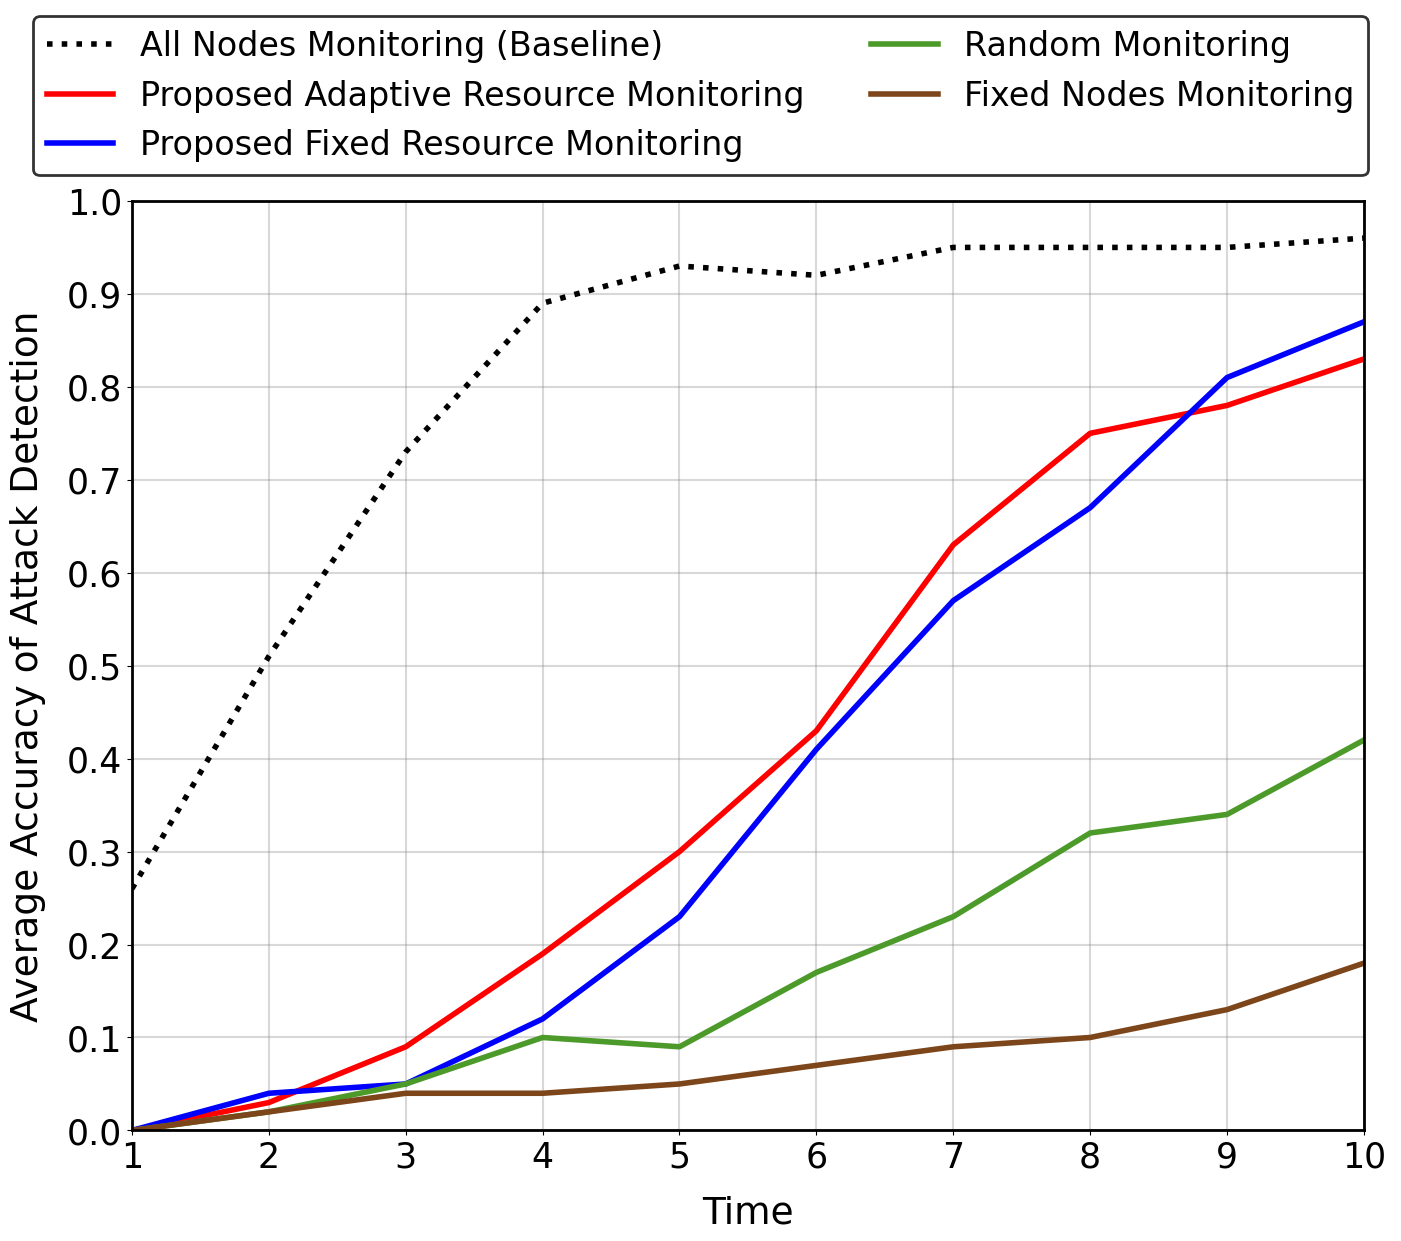

In [ ]:
plt.rcdefaults()
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharex=False, sharey=False)
fontsize = 26

for pack in packed_for_m:
  (fixed, ours, random, alll, random_fixed, threshold) = pack
  for mode in modes:
    all_acc_list, mode_label, mode_color = mode_handler(mode, 3)
    mean_acc_list = np.zeros(T)
    for num in range(0, max_num):
      mean_acc_list += all_acc_list[num]
    mean_acc_list/= max_num
    X = np.arange(0, T)
    linestyle = '-'
    if mode == 'all':
      linestyle='dotted'
    ax1.plot(X, mean_acc_list, linewidth=4, label=mode_label, color=mode_color, linestyle=linestyle)
  yticks = np.arange(11)/10
  ax1.set_xticks(ticks=X)
  ax1.set_xticklabels(X+1)
  ax1.yaxis.set_tick_params(labelsize=fontsize-1)
  ax1.xaxis.set_tick_params(labelsize=fontsize-1)
  ax1.set_ylabel(r'Average Accuracy of Attack Detection', fontsize=fontsize+1, labelpad=15)
  ax1.set_xlabel(r'Time', fontsize=fontsize+1, labelpad=15)
  ax1.grid(color='gray', linestyle='-', linewidth=1.5, alpha=0.3)
  # plt.legend(loc='best',prop={'size': fontsize-2} )
  ax1.set_xlim([0,T-1])
  ax1.set_ylim([0.05,1])
  ax1.set_yticks(ticks=yticks)


[x.set_linewidth(2) for x in ax1.spines.values()]
############
fig.set_size_inches(16, 13)
handles, labels = ax1.get_legend_handles_labels()
leg = fig.legend(handles, labels, loc='upper center', prop={'size': fontsize-2}, ncol= 2)
leg.get_frame().set_linewidth(2)
leg.get_frame().set_edgecolor("black")
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)
plt.subplots_adjust(left=0.13, bottom=0.125, right=0.9, top=0.84
                    , wspace=0.2, hspace=0.05)
plt.show()
# fig.text(0.09, 0.5, 'Average Compromise Rate', va='center', rotation='vertical', fontsize=fontsize+1)

plt.show()